These data were taken with the stage regulating at about 100 mK.

In [1]:
%matplotlib inline

In [2]:
from collections import defaultdict

In [8]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator.lmfit_resonator import LinearLossResonatorWithCable

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-15_155457_centered.npd/')

In [5]:
swp_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweep') and not 'Stream' in name]
sss_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]
snap_list = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]
print([(snap.x.ptp(), snap.y.ptp()) for snap in snap_list])

[(85.0, 101.0), (40.0, 41.0), (22.0, 22.0), (45.0, 30.0), (22.0, 18.0), (18.0, 17.0), (72.0, 61.0), (33.0, 28.0), (19.0, 19.0), (54.0, 42.0), (29.0, 23.0), (19.0, 18.0), (14.0, 15.0), (8.0, 10.0), (9.0, 8.0)]


In [6]:
swp_dict = defaultdict(list)
sss_dict = defaultdict(list)
for swp, sss in zip(swp_list, sss_list):
    swp_dict[sss.state.lo_index].append(swp)
    sss_dict[sss.state.lo_index].append(sss)

# Resonator model

In [10]:
for swp in swp_list:
    swp.fit_resonator(model=LinearLossResonatorWithCable)
for sss in sss_list:
    sss.sweep.fit_resonator(model=LinearLossResonatorWithCable)

# Tone centering

In [11]:
print([sss.stream.tone_offset_frequency() for sss in sss_list])

[array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.])]


# Forward scattering versus frequency

In [12]:
f_label = 'frequency / MHz'
s21_label = '$|S_{21}|^2$ / dB'
ic_title = r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'

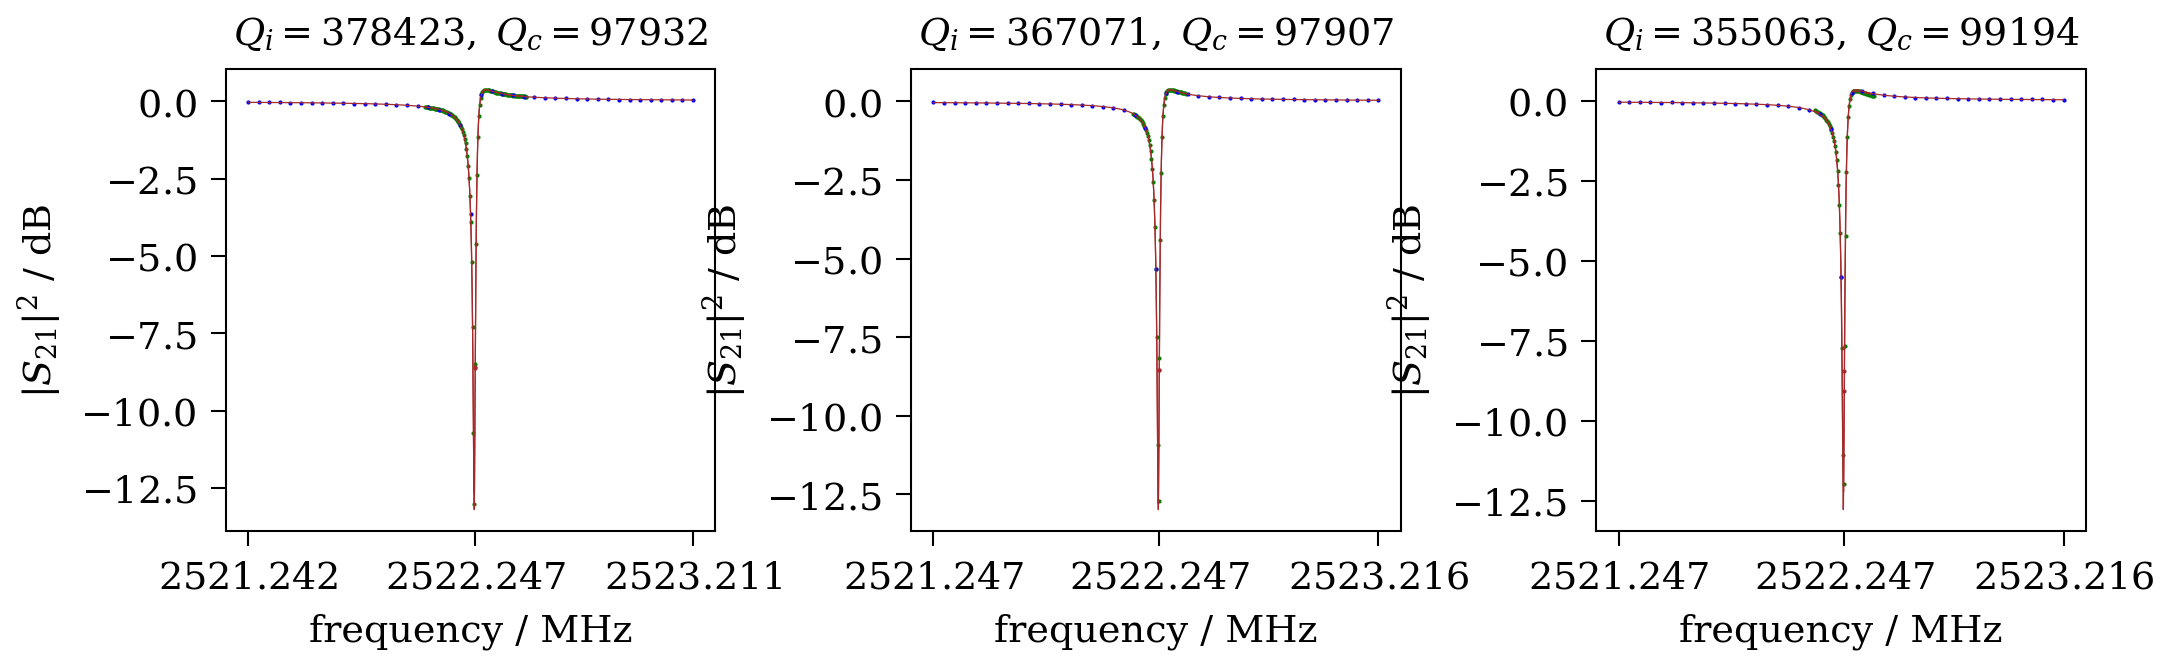

In [15]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

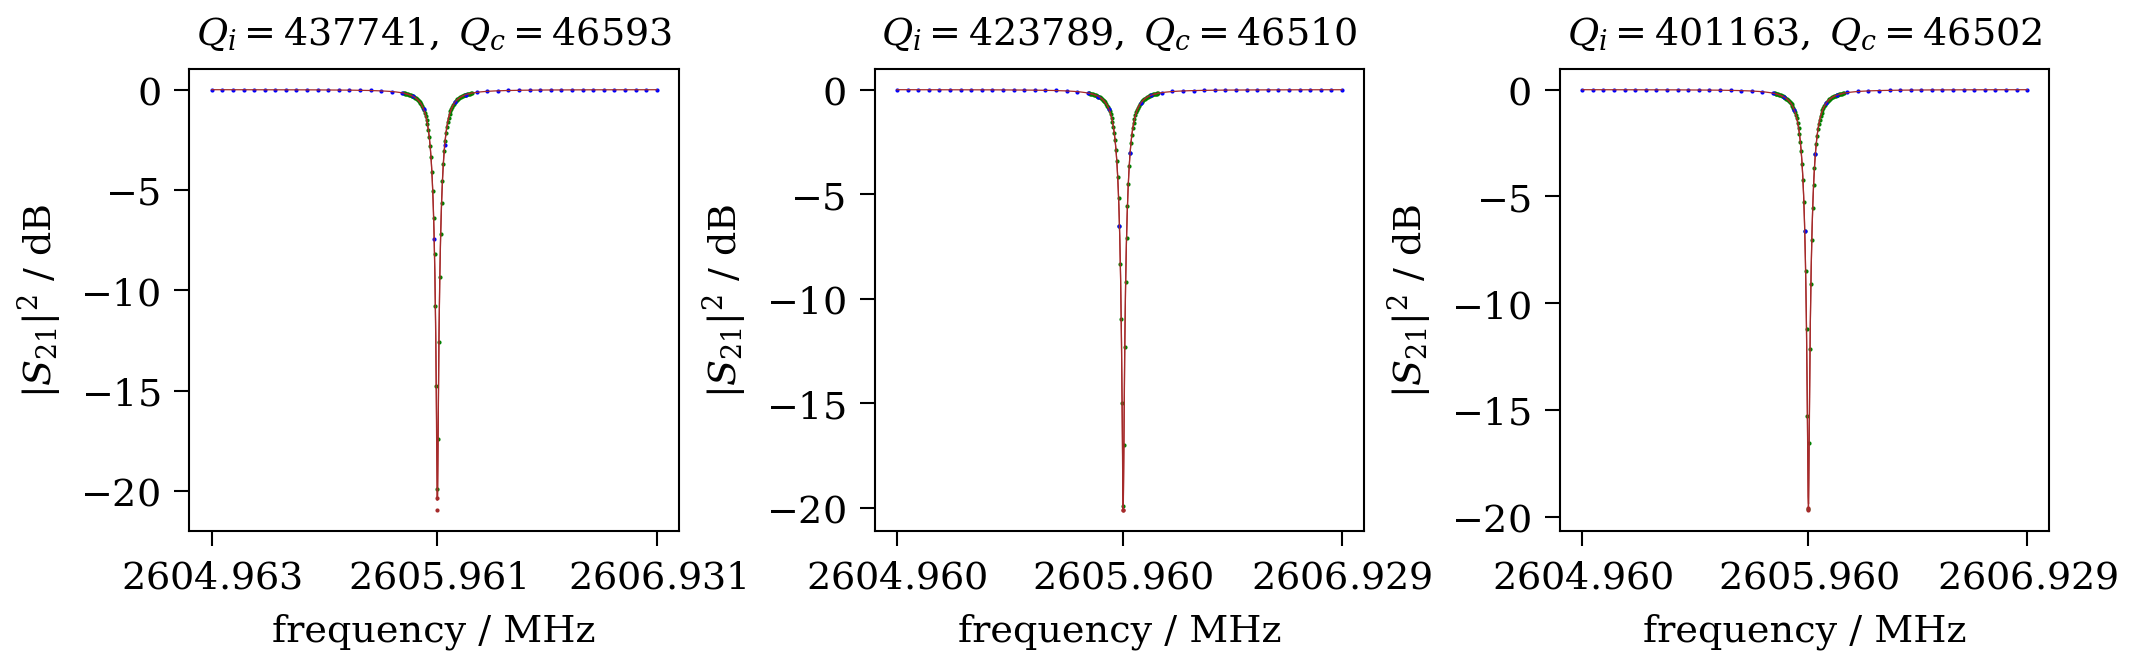

In [16]:
channel = 1
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

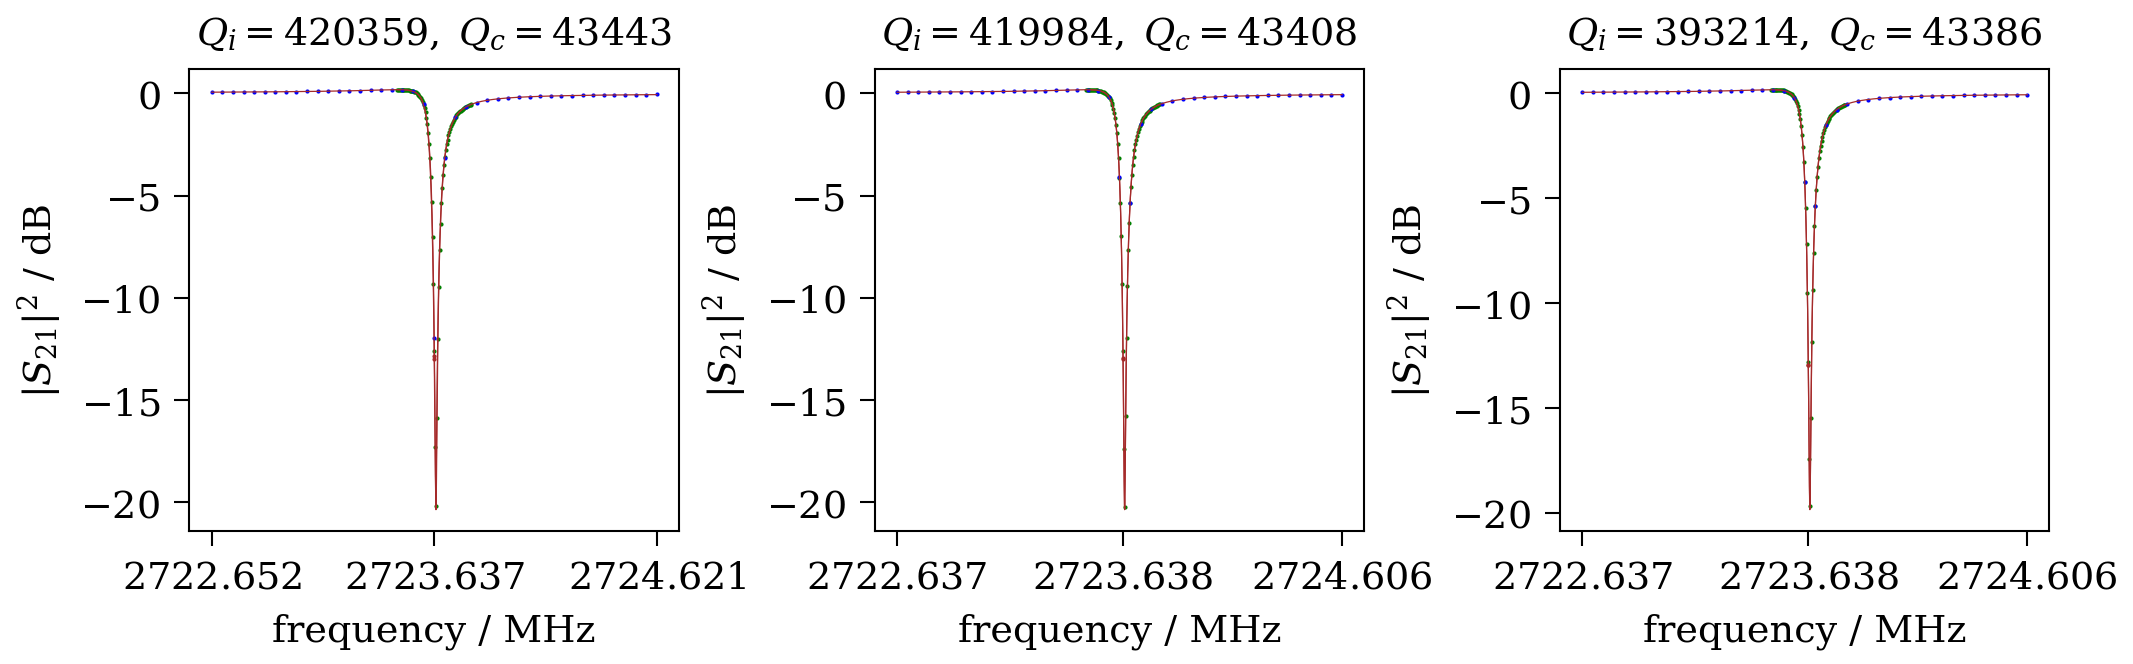

In [17]:
channel = 2
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

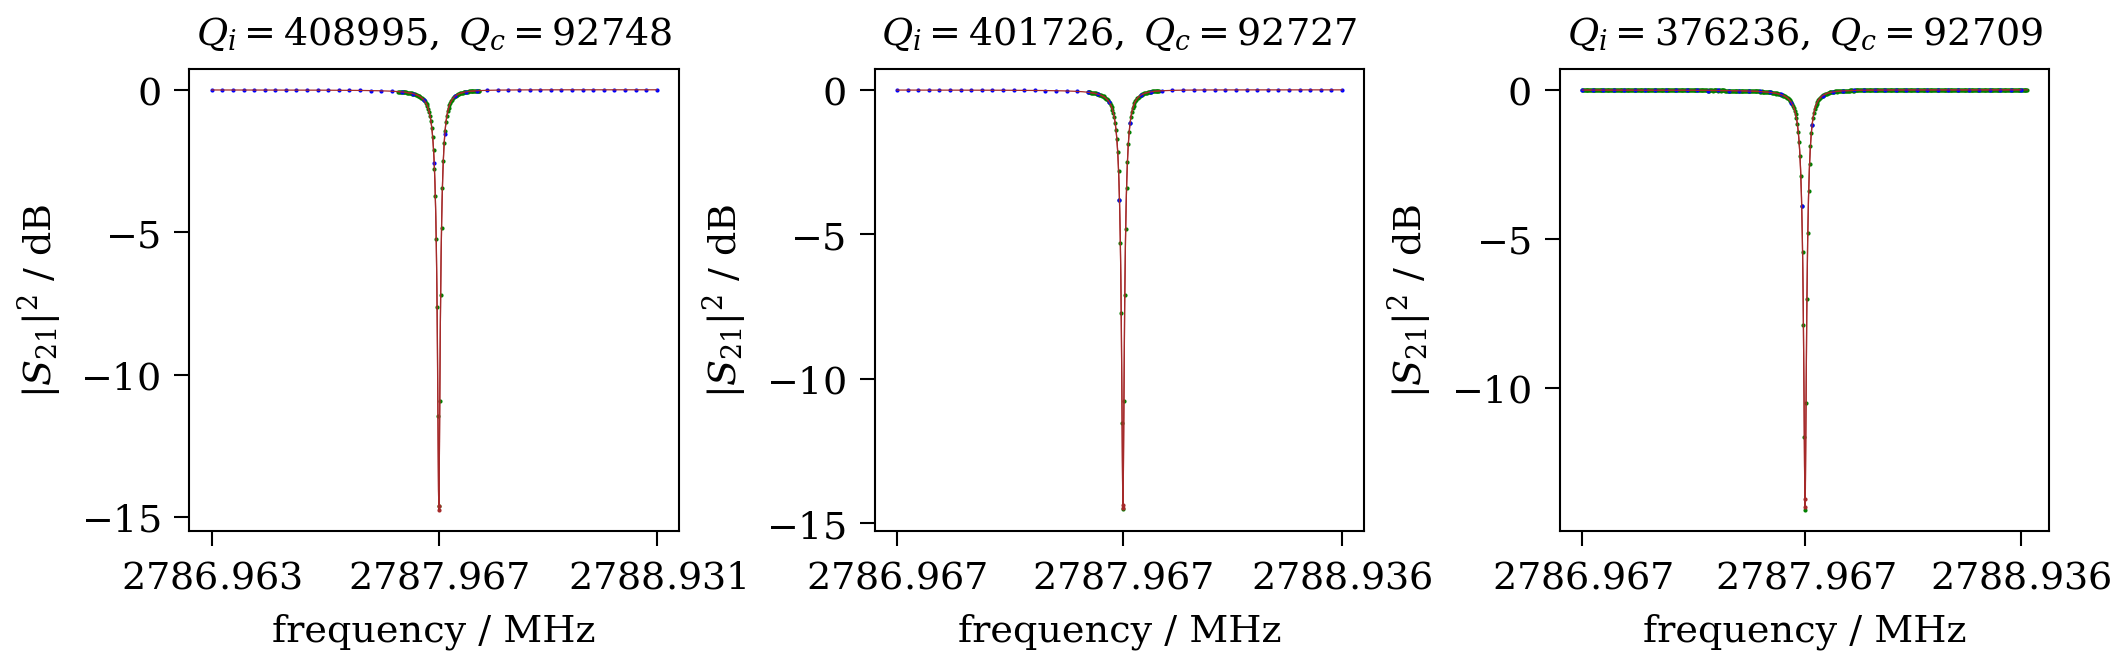

In [18]:
channel = 3
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

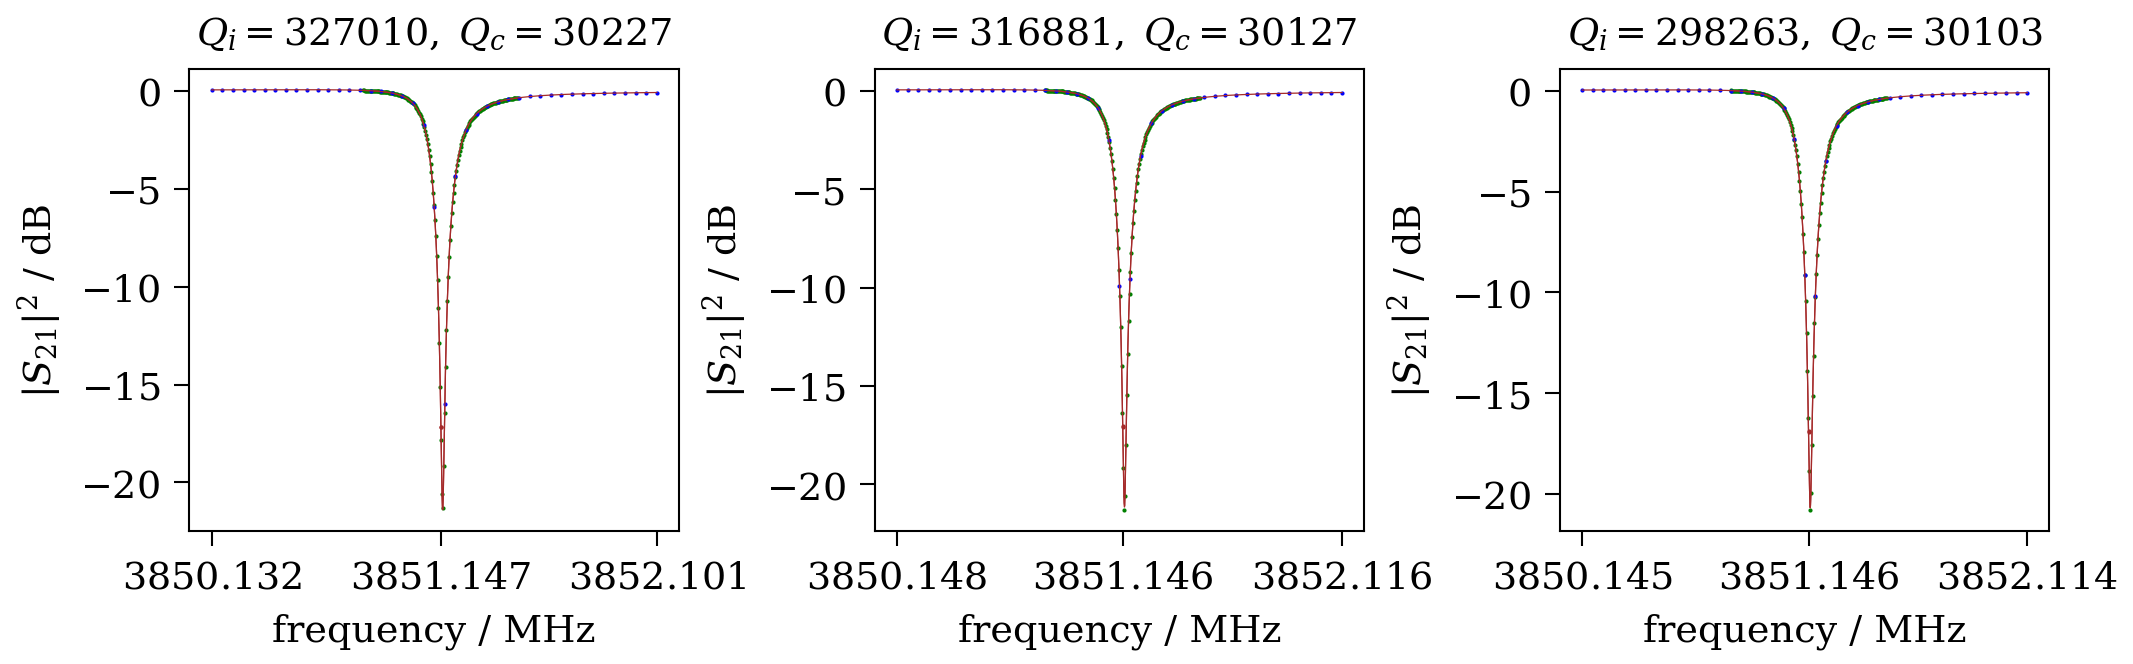

In [19]:
channel = 4
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

# Forward scattering in the complex plane

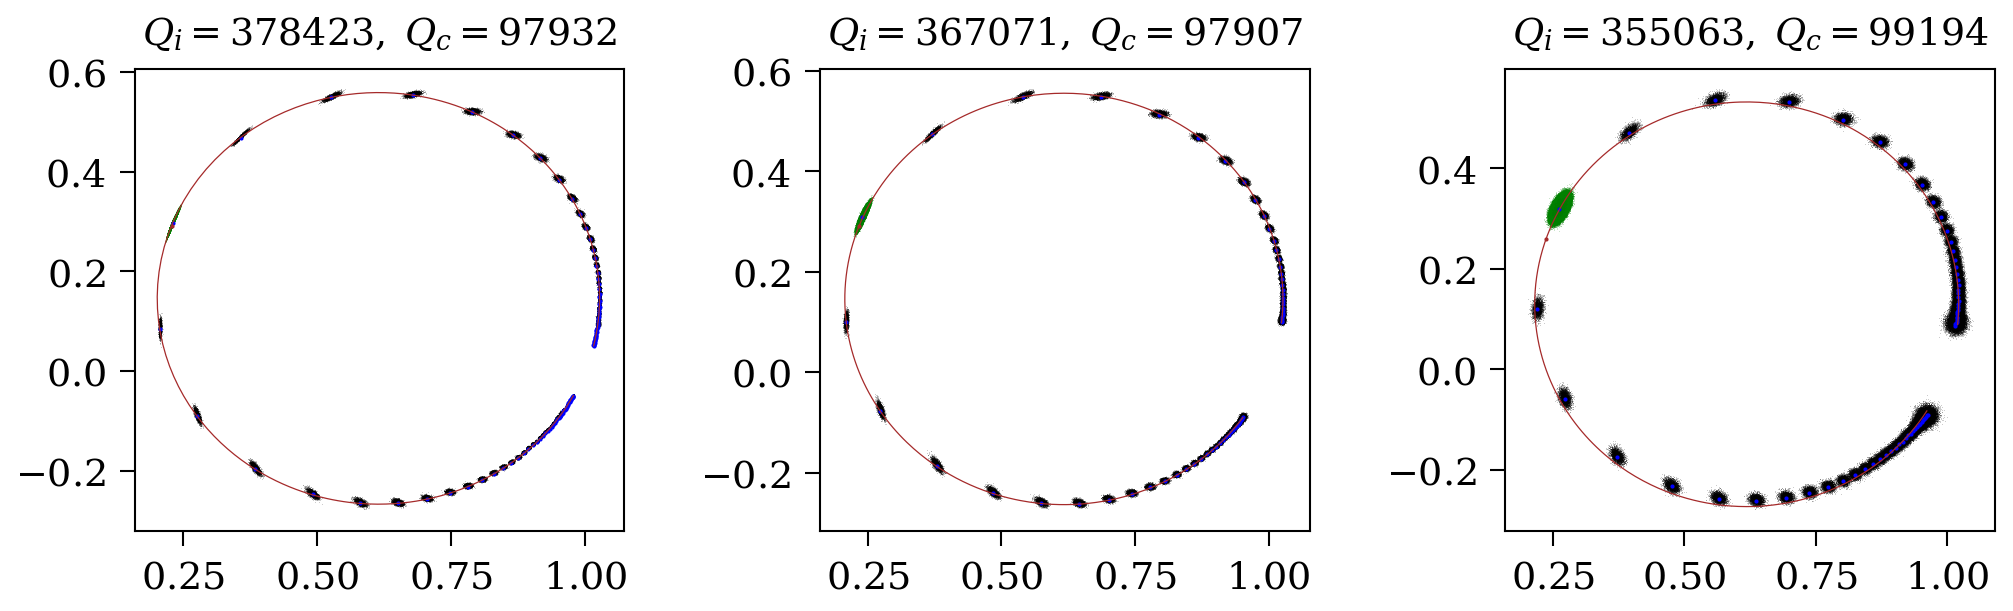

In [20]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

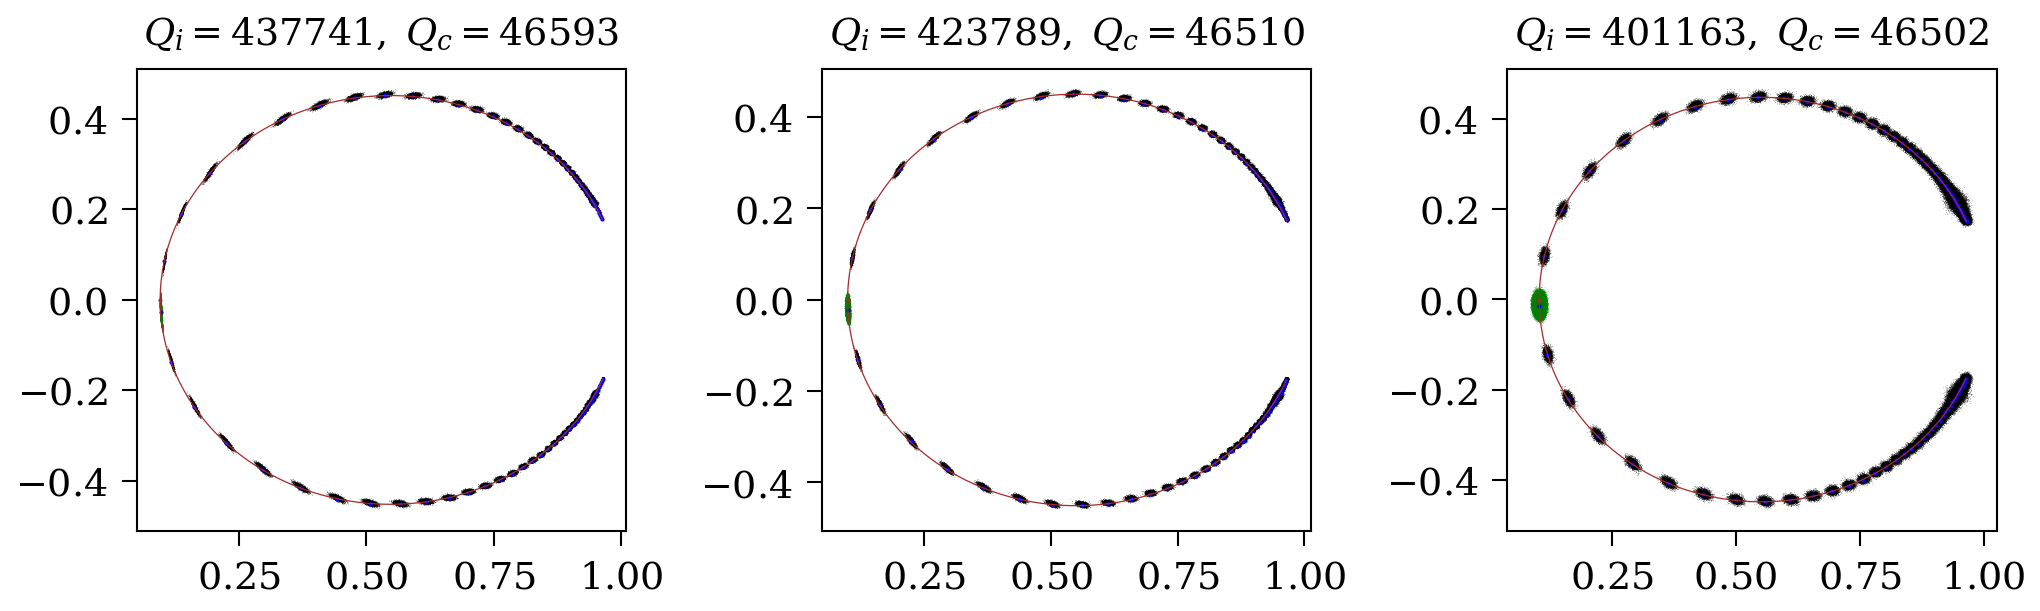

In [21]:
channel = 1
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

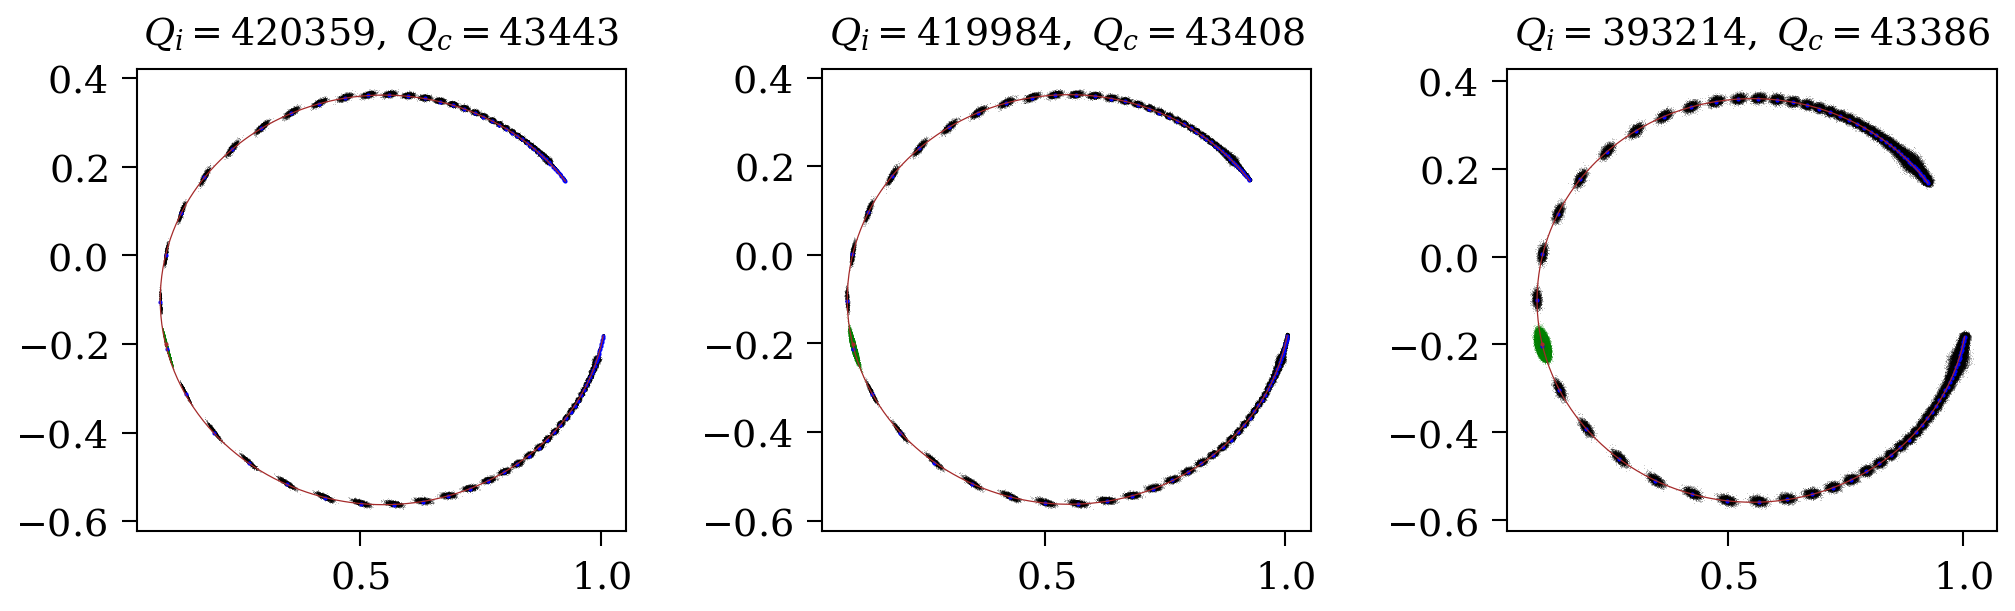

In [22]:
channel = 2
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

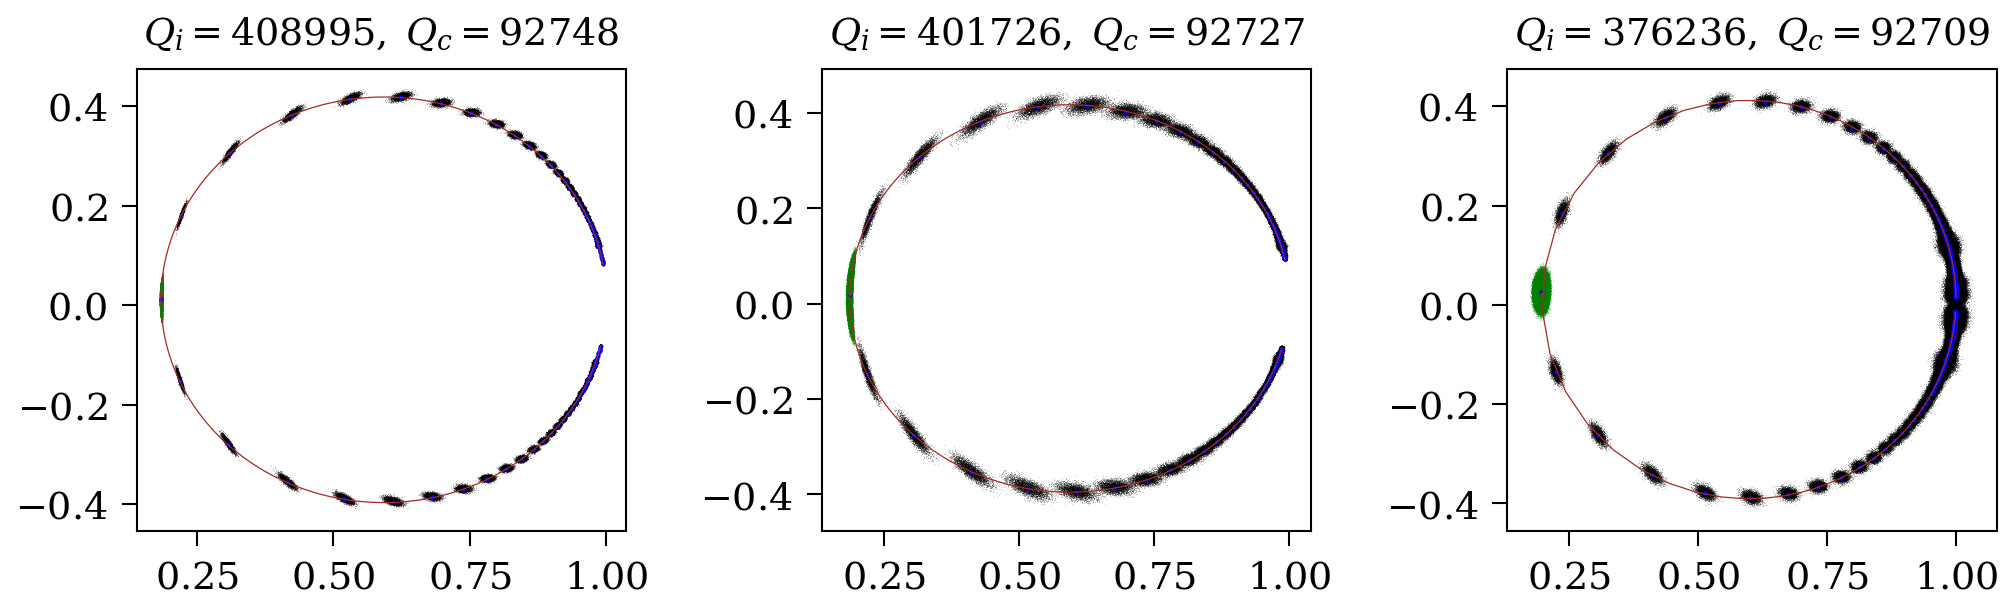

In [23]:
channel = 3
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

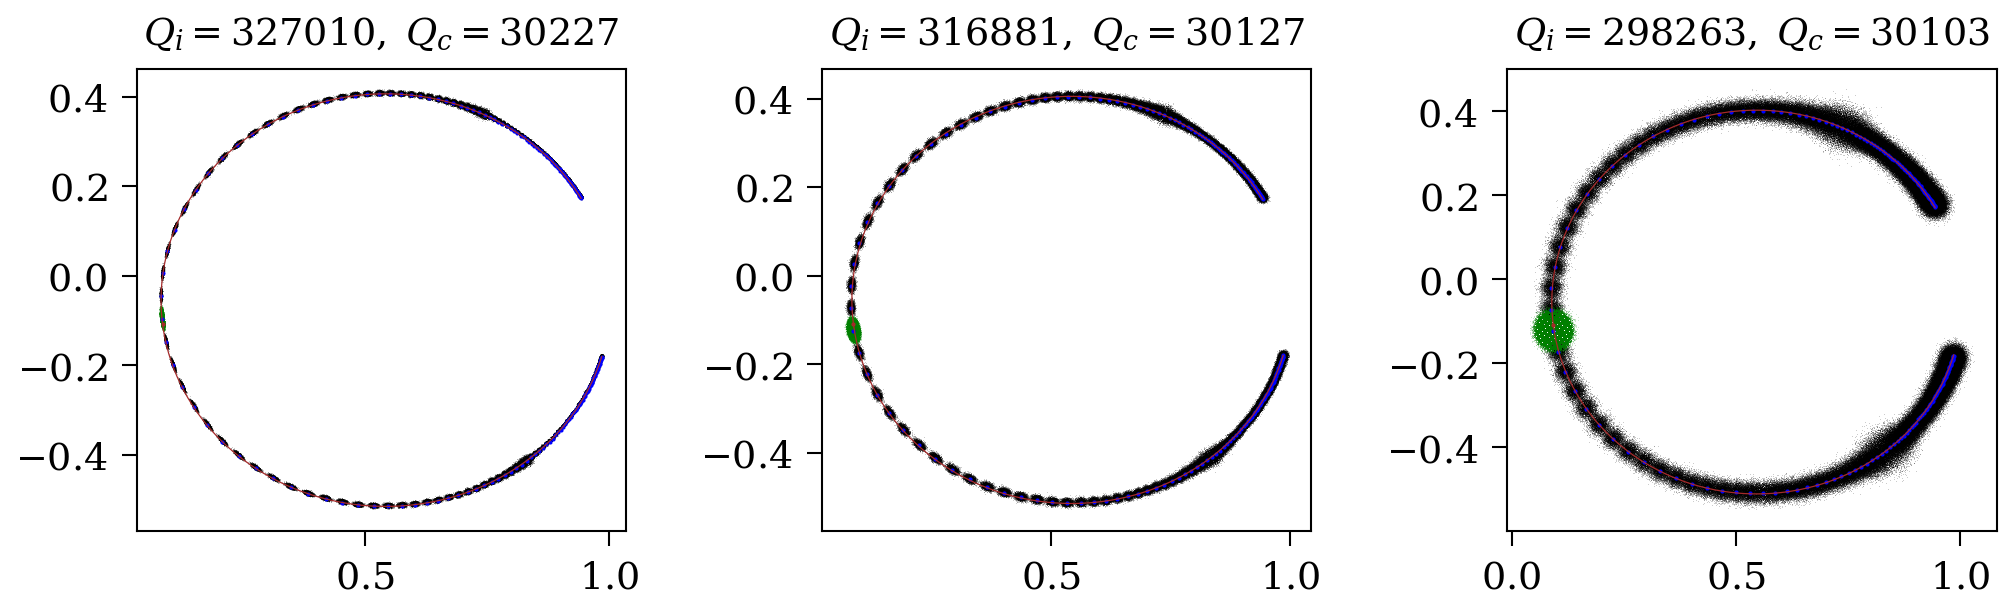

In [24]:
channel = 4
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

# $S_{xx}$ and $S_{yy}$

In [25]:
xx_and_yy = {'xlabel': 'frequency / Hz',
             'ylabel': 'spectral density / Hz$^{-1}$',
             'title': ''}

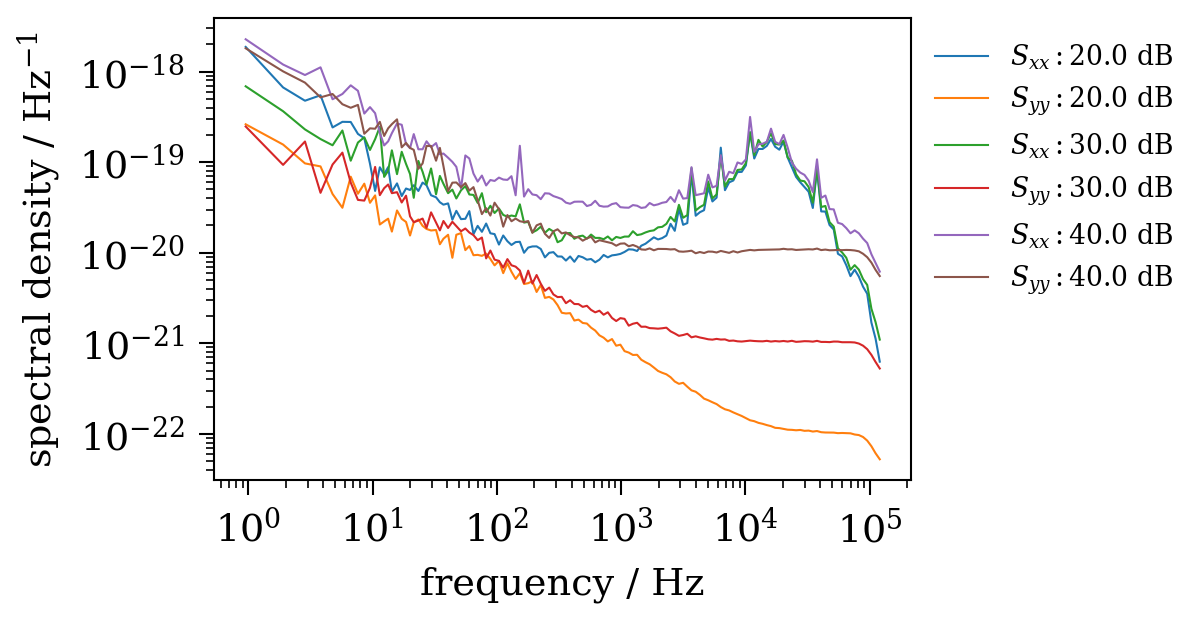

In [26]:
channel = 0
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

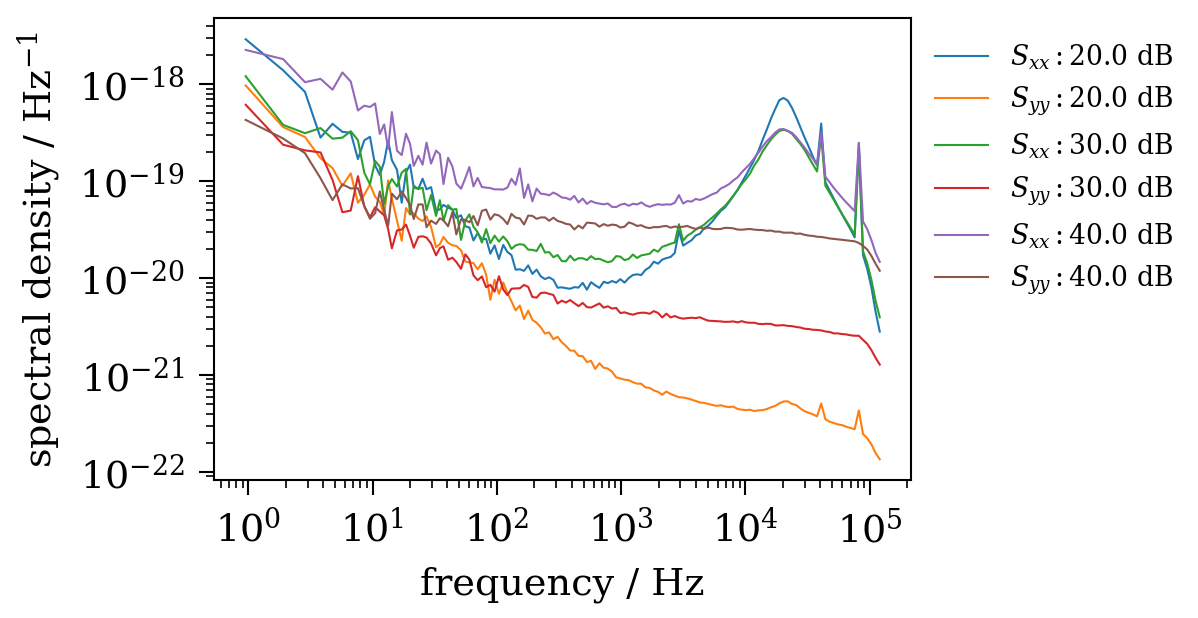

In [27]:
channel = 1
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

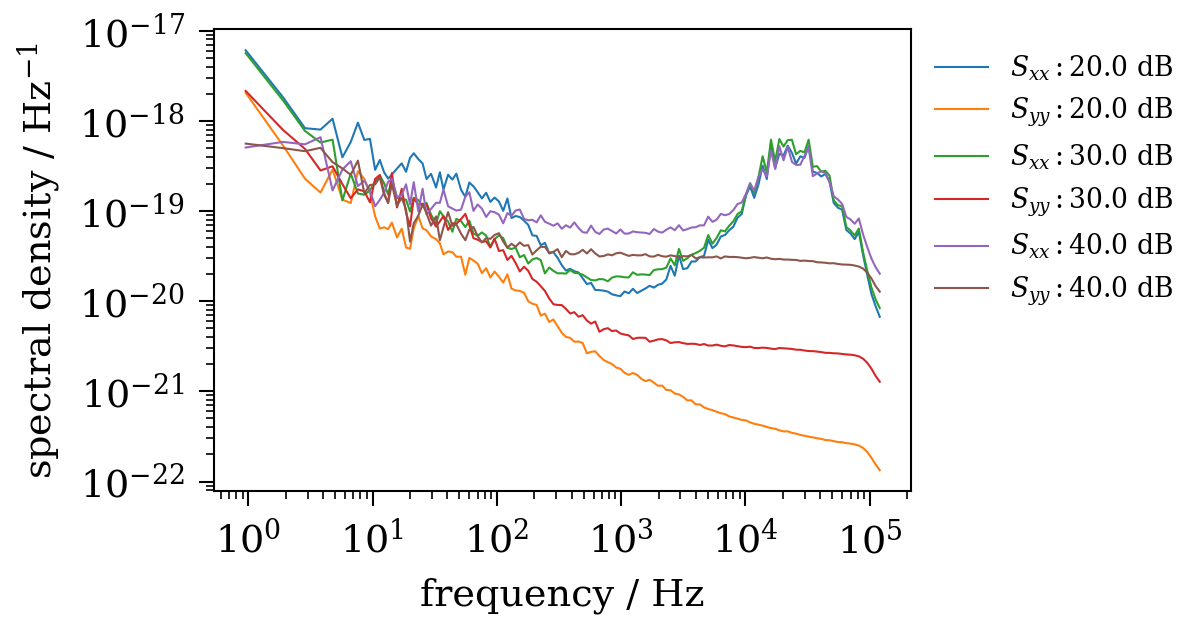

In [28]:
channel = 2
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

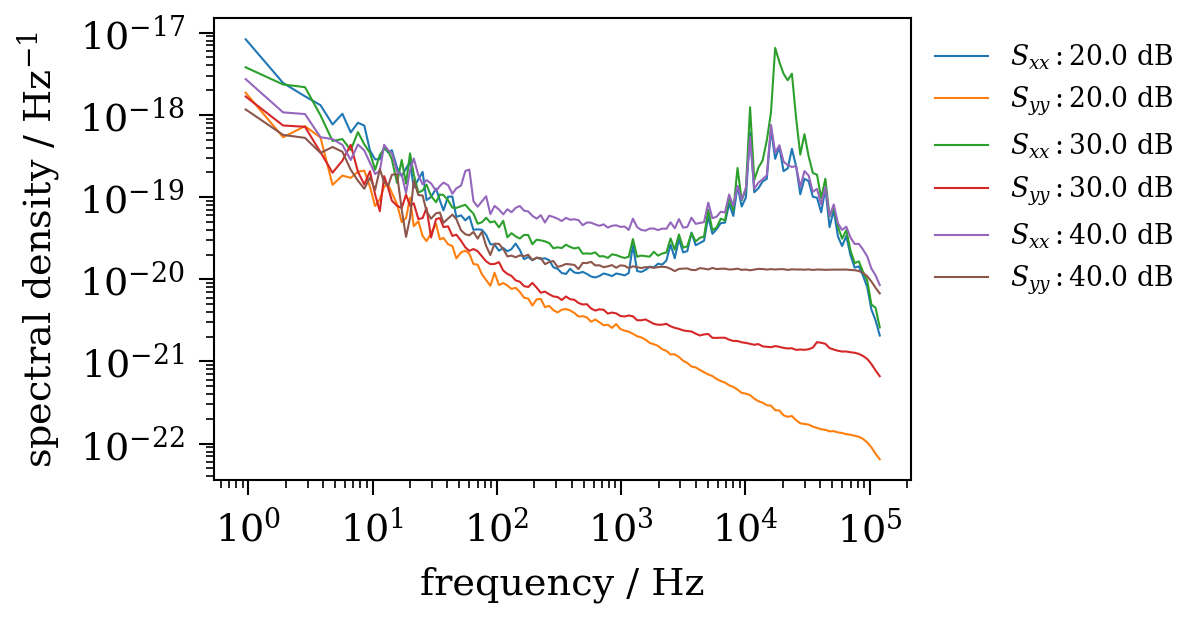

In [29]:
channel = 3
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

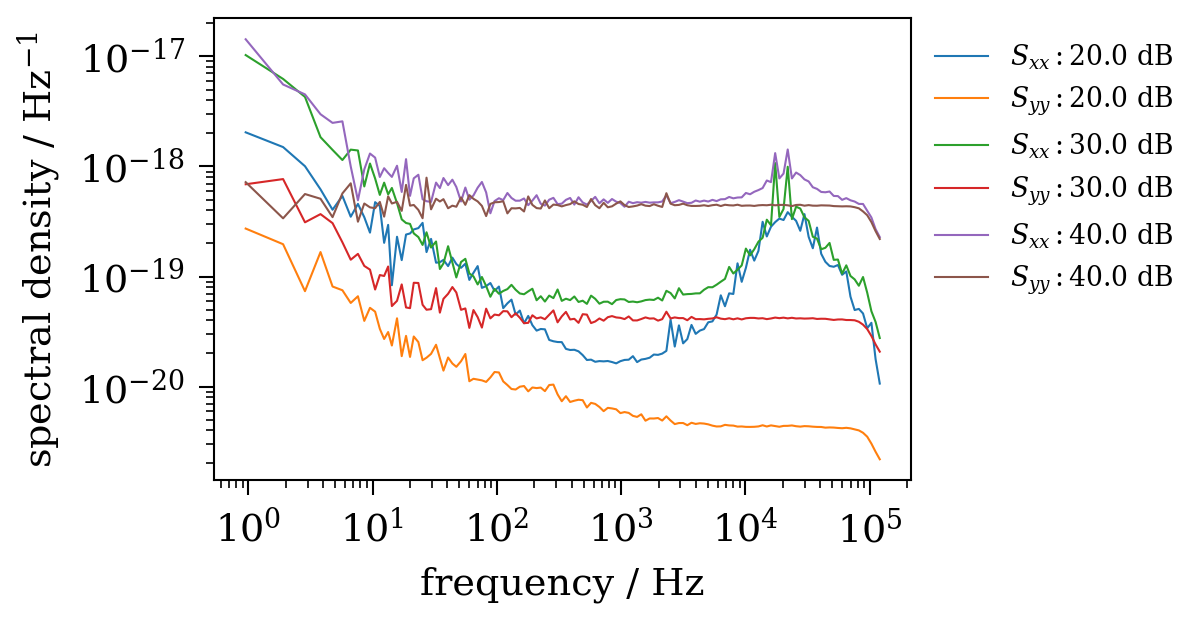

In [30]:
channel = 4
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

# $S_{xx} - S_{yy}$

In [31]:
xx_minus_yy = {'xlabel': 'frequency / Hz',
               'ylabel': 'spectral density / Hz$^{-1}$',
               'title': ''}

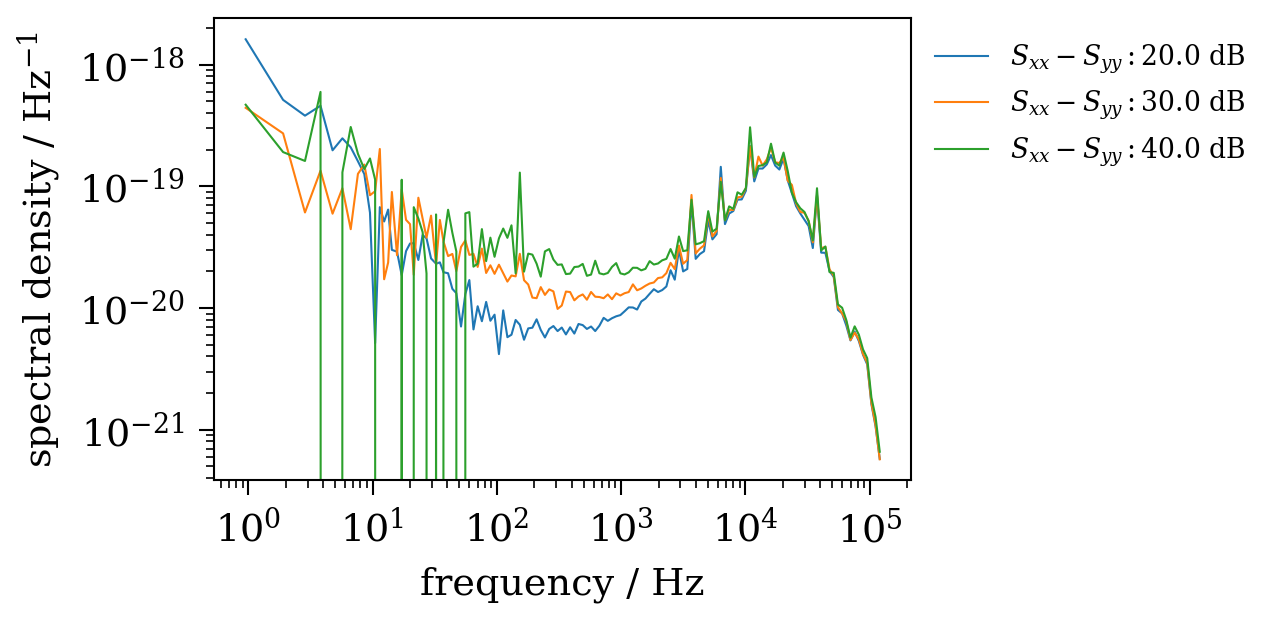

In [32]:
channel = 0
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

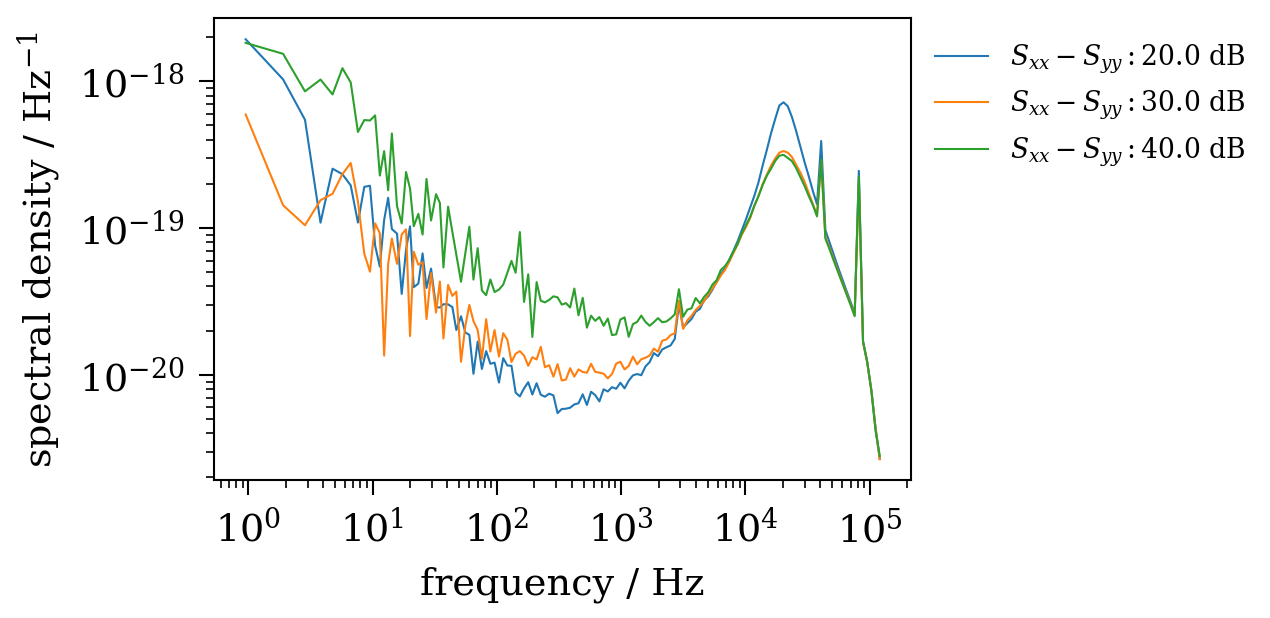

In [33]:
channel = 1
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

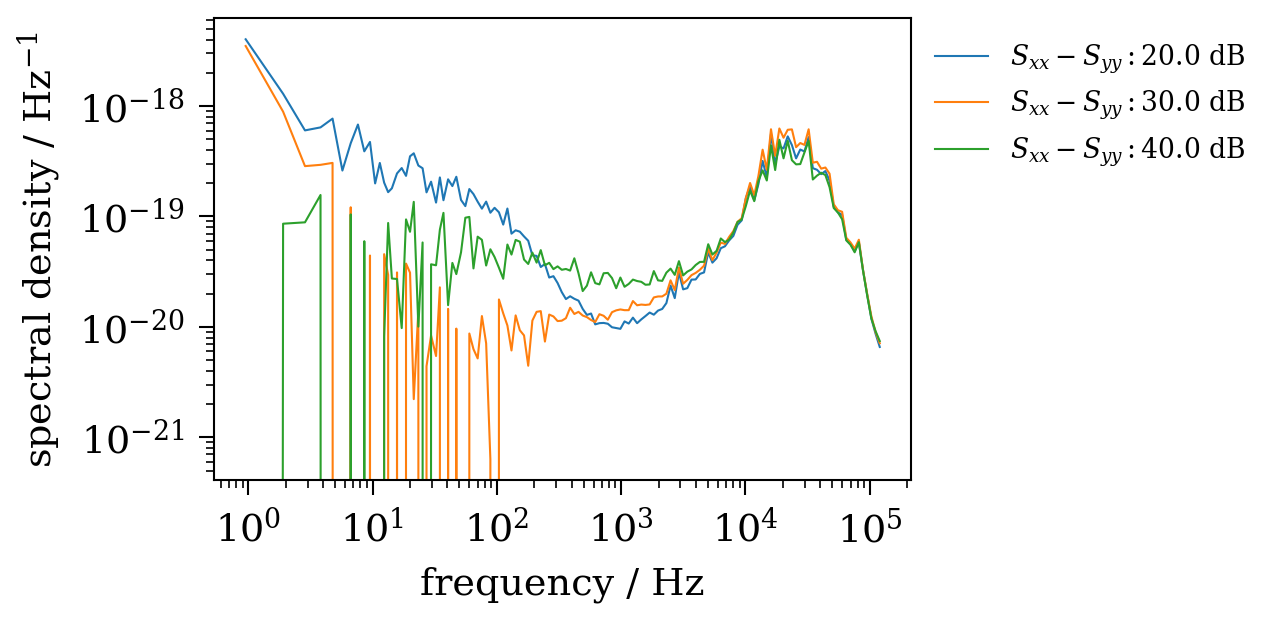

In [34]:
channel = 2
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

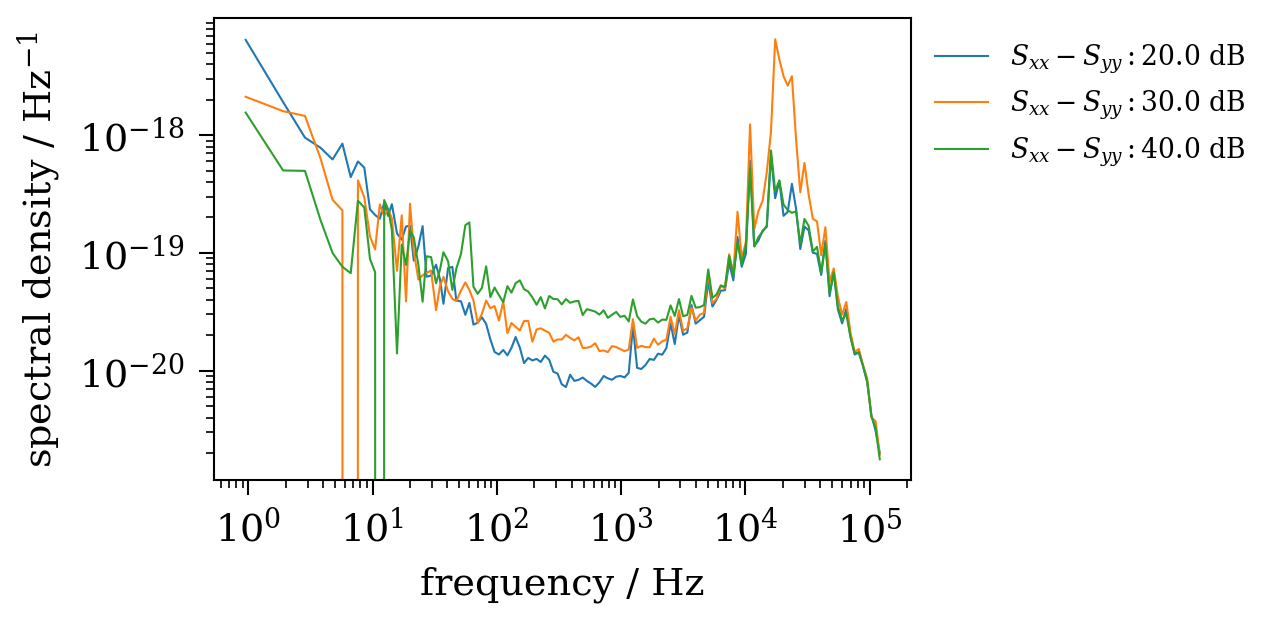

In [35]:
channel = 3
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

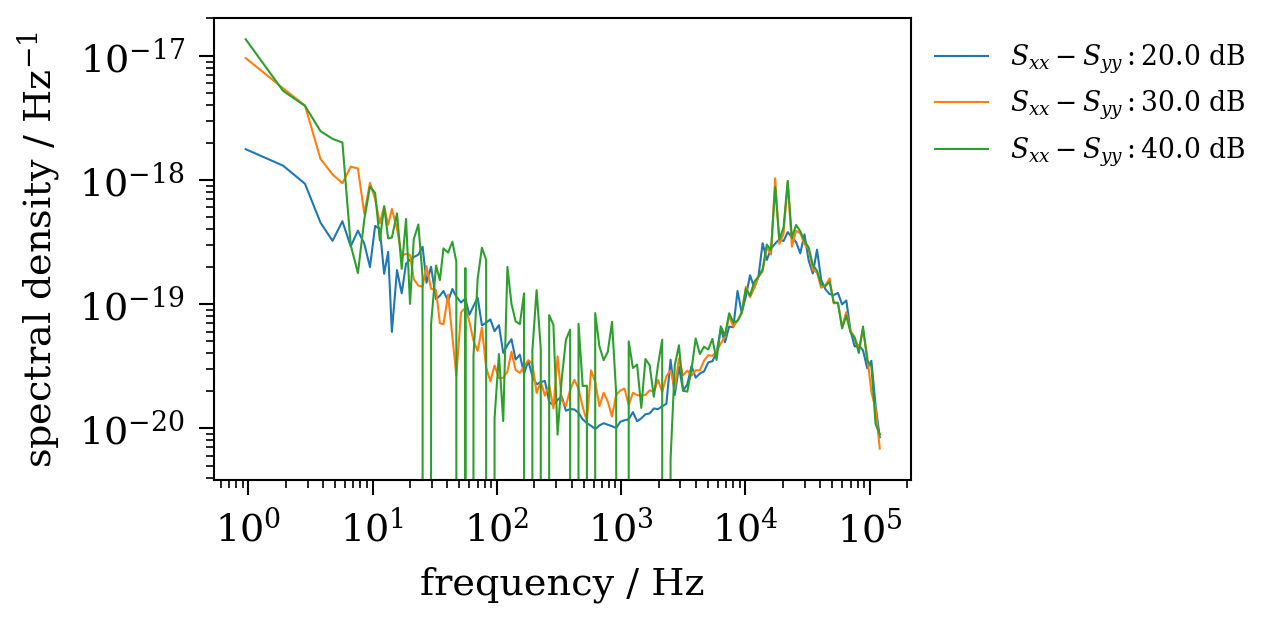

In [36]:
channel = 4
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));